In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import glob
from astropy.io import fits

In [130]:
def gaussian_plz(x, A, var, mu):
    return A * np.exp(-(x - mu)**2 / (2 * var))
def stas_plz(data):
    return np.mean(data), np.median(data), stats.mode(data)[0][0] ,np.std(data)

def load_plz(pattern):
    """Whatever you would type into glob, just put in the function"""
    files = sorted(glob.glob(pattern))
    files = list(map(fits.open, files[:]))
    file = []
    for i in range(len(files)):
        file.append(files[i][0].data.flatten())
    return np.array(file)

# Master Flats

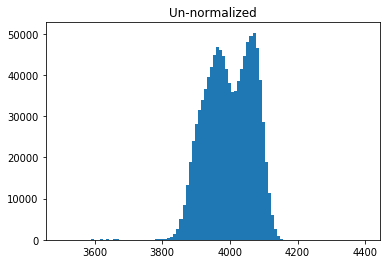

In [131]:
flat = load_plz("labdata/*FLAT*")
master_flat_field = np.median(flat,axis=0)

pmf,bins,_ = plt.hist(master_flat_field, bins=100, range=(3500,4400));
plt.title("Un-normalized");

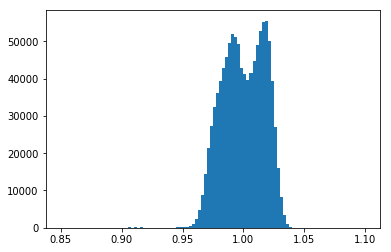

In [132]:
normalized_MFF = master_flat_field / np.median(master_flat_field) 
plt.hist(normalized_MFF, bins=100, range=(0.85,1.1));
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0));

In [133]:
mean_MFF,mead_MFF,mode_MFF,sd_MFF = stas_plz(normalized_MFF)

# Master Dark

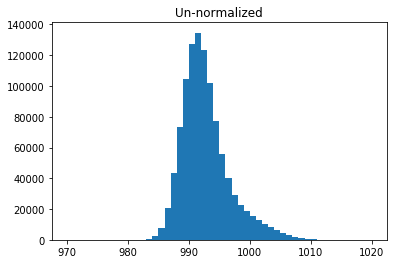

In [157]:
dark = load_plz("labdata/*DARK*")
dark_master = np.median(dark,axis=0)

pmf,bins,_ = plt.hist(dark_master, bins=50, range=(970,1020))
plt.title("Un-normalized");

In [145]:
dark_master

array([1069.5, 1048. , 1036.5, ...,  997. ,  996.5,  993.5])